In [76]:
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph
import networkx as nx
import matplotlib.pyplot as plt
import requests

In [77]:
def LLM(text):
    return "LLM Response" + text

In [78]:
def calculator(query):
    try:
        result = eval(query,{"__builtins__": None},{})
        return f"The result is: {result}"
    except Exception as e:
        return f"Error: {str(e)}"

In [79]:
def chatbot_node(text):
    if any(op in text for i in "+-*/"):
        return calculator(text)
    else:
        return LLM(text)

In [80]:
workflow = StateGraph("WeatherMind")
workflow.add_node("chatbot",chatbot_node)
workflow.set_entry_point("chatbot")
Weather = workflow.compile()

Text(0.5, 1.0, 'Weather Workflow')

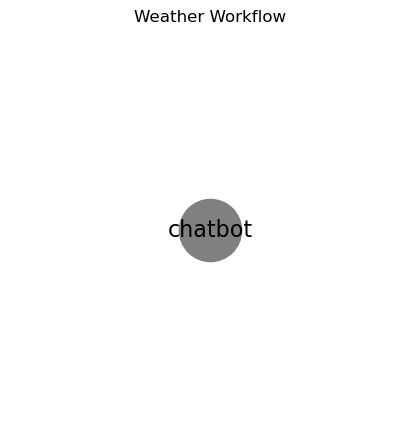

In [81]:
G = nx.DiGraph()
G.add_node("chatbot")
plt.figure(figsize=(4, 4))
nx.draw(G,with_labels=True, node_size=2000, node_color="grey", font_size=16)
plt.title("Weather Workflow")

In [82]:
def fashion_recommender(query):
    if "in" in query:
        location = query.split("in")[-1].strip().capitalize()
    else:
        location = "Unknown Location"
    return f"Recommended fashion for {location}: Light jacket and jeans."

In [83]:
def weather_extractor(query):
    if "in" in query:
        location = query.split("in")[-1].strip().capitalize()
    else:
        location = "Unknown Location"
    api_key = "Not have any API key"
    url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"
    try:
        response = requests.get(url).json()
        temp = response["main"]["temp"]
        description = response["weather"][0]["description"]
        return f"The weather in {location} is {temp}°C with {description}."
    except :
        return "Could not retrieve weather data. Please check the location."

In [84]:
def chatbot_node2(text):
    if "weather" in text.lower():
        return weather_extractor(text)
    elif "fashion" in text.lower():
        return fashion_recommender(text)
    elif any(op in text for op in "+-*/"):
        return calculator(text)
    else:
        return LLM(text)

In [85]:
workflow = StateGraph("WeatherMind2")
workflow.add_node("chatbot", chatbot_node2)
workflow.set_entry_point("chatbot")
Weather2 = workflow.compile()


In [86]:
conversation_history = []
def chatbot_node3(text):
    conversation_history.append(text)
    if "weather" in text.lower():
        response = weather_extractor(text)
    elif "fashion" in text.lower():
        response = fashion_recommender(text)
    elif any(op in text for op in "+-*/"):
        response = calculator(text)
    else:
        response = LLM(text)
    conversation_history.append(response)
    return response


In [87]:
def resercher(query):
    if "weather" in query.lower():
        return weather_extractor(query)
    elif "fashion" in query.lower():
        return fashion_recommender(query)
    else:
        return "Researcher: No data Found"

In [88]:
def researcher_agent(query):
    if "weather" in query:
        return weather_extractor(query)
    elif "fashion" in query or "trend" in query:
        return fashion_recommender(query)
    else:
        return "Researcher: No data found."

In [89]:
def analyst_agent(data):
    return f"Analyst: Here's a summary -> {data}"

In [90]:
def decision_maker_agent(summary):
    return f"Decision: Based on analysis, I recommend: {summary}"

In [91]:
def multi_agent_router(query):
    research = researcher_agent(query)
    analysis = analyst_agent(research)
    decision = decision_maker_agent(analysis)
    return decision

In [92]:
workflow = StateGraph("WeatherMindMultiAgent")
workflow.add_node("router", multi_agent_router)
workflow.set_entry_point("router")
weather_mind_multiagent = workflow.compile()

c:\Users\pblas\.conda\envs\myenv\lib\site-packages\langgraph\graph\state.py:96: UserWarning: Invalid state_schema: WeatherMindMultiAgent. Expected a type or Annotated[type, reducer]. Please provide a valid schema to ensure correct updates.
 See: https://langchain-ai.github.io/langgraph/reference/graphs/#stategraph
  warnings.warn(
